- - -

Monedas a utilizar:<br>

Simbolos [eth, ada, dot, link, vet, atom, xtz, neo, miota, zil]

Id(nombres): [ethereum, cardano, polkadot, chainlink, vechain, cosmos, tezos, neo, iota, zilliqa]

Rango de fechas en Timestamp (Cantidad de segundos desde 01 de Enero de 1970)<br>

Unix Timestamp	1661054400
GMT	Sun Aug 21 2022 04:00:00 GMT+0000
Your Time Zone	Sun Aug 21 2022 00:00:00 GMT-0400 (Venezuela Time)
Relative	a year ago

Unix Timestamp	1692590400
GMT	Mon Aug 21 2023 04:00:00 GMT+0000
Your Time Zone	Mon Aug 21 2023 00:00:00 GMT-0400 (Venezuela Time)
Relative	in 4 hours

- - - 

Inicio de descarga y extracción de los datos a trabajar.

Se Cargan las librerias

In [1]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import requests
import os

cg = CoinGeckoAPI()

- - -

## ETL (Extraer, Transformar y Cargar)
### Es un conjunto de procesos que se utilizan para extraer, transformar y cargar datos de un origen a un destino.

Puede verificar el estado del servidor API para la API CoinGecko usando el método ping()

In [9]:
if(cg.ping()):
    print('Esta respondiendo el servicio API de coingecko')
else: print('No esta respondiendo el servicio API de coingecko')

Esta respondiendo el servicio API de coingecko


Funcion que se conecta al API de coingecko y retorna la canidad actual de monedas en su plataforma.

In [7]:
def cant_monedas():
    all_coins_list = cg.get_coins_list()
    all_coins_list_df = pd.DataFrame(all_coins_list)
    cant_monedas, columnas = all_coins_list_df.shape
    return cant_monedas

In [10]:
if(cg.ping()):
    print('La cantidad actual de monedas: ', cant_monedas())
else: print('Servicio API caido o sn conxion de red!!')

La cantidad actual de monedas:  10214


Funcion que permite cargar un archivo, se le pasa el nombre del archivo a cargar y retorna un dataframe con los datos.

In [11]:
def cargar_archivo(arhivo: str):
    ruta_archivo_cardano = "./Datasets/"+arhivo
    df = pd.read_csv(ruta_archivo_cardano, sep=';')
    df.drop_duplicates(inplace=True)
    return df

- - - 
Valores OHLC De CoinGecko<br>

Se obtienen los valores para cada moneda por cierta cantidad de dias historicos desde la fecha actual:<br>
- Time: La fecha y hora de la transaccion.<br>
- Open: El precio de apertura del proceso de transaccion.<br>
- Close: El precio al cierre del proceso de transaccion.<br>
- Low: El precio mas bajo del proceso de transaccion.<br>
- High: El precio mas alto del proceso de transaccion.<br>

utilizando el método get_coin_ohlc_by_id().<br>
Datos cada 4 dias desde el 22 Agosto 2022 al 22 Agosto 2023, 'Time', 'Open', 'High', 'Low', 'Close'
- - -

Se crea una funcion, para que sea facil ser llamada para cada moneda, la funcion recibe el nombre de la criptomoneda, el cambio que se desea: usd y el tiempo en dias, contados desde la fecha actual hacia atrás en dias.

In [2]:
def obtener_cripto_ohlc(cripto: str, alCambio: str, tiempo: int):
    cripto_ohlc = cg.get_coin_ohlc_by_id(id = cripto,
        vs_currency = alCambio,
        days = tiempo)
    cripto_ohlc_df = pd.DataFrame(cripto_ohlc, columns = ['Time', 'Open', 'High', 'Low', 'Close'])
    cripto_ohlc_df['Time'] = pd.to_datetime(cripto_ohlc_df['Time'], origin='unix', unit="ms")
    return cripto_ohlc_df

Se generan los archivos csv de cada criptomoneda en archivos individual, a cada archivo se le adiciona una columna con el Id (nombre) de la moneda.

In [5]:
lista = ['ethereum', 'cardano', 'polkadot', 'chainlink', 'vechain', 'cosmos', 'tezos', 'neo', 'iota', 'zilliqa']    # Lista con los Id de las monedas
for cripto in lista:
    df_ohlc = obtener_cripto_ohlc(cripto, 'usd', 365)   # Se le pasa el Id de la moneda, el tipo de cambio y la cantidad historica de dias.
    df_ohlc['Id'] = cripto                              # Se le adiciona una columna con el Id de la moneda
    ruta_archivo = "./Datasets/"+cripto+'_ohlc.csv'     # Se crea un archivo con el nombre de la moneda
    df_ohlc.to_csv(ruta_archivo, sep=';', index=False)

Se genera un unico archivo csv con todas las criptomonedas.

In [6]:
df_criptomonedas = []
lista = ['ethereum', 'cardano', 'polkadot', 'chainlink', 'vechain', 'cosmos', 'tezos', 'neo', 'iota', 'zilliqa']    # Lista con los Id de las monedas
for cripto in lista:
    df = obtener_cripto_ohlc(cripto, 'usd', 365)    # Se le pasa el Id de la moneda, el tipo de cambio y la cantidad historica de dias.
    df['Id'] = cripto                               # Se le adiciona una columna con el Id de la moneda
    df_criptomonedas.append(df)                     # Se va creando un dataset con la informacion solicitada por moneda

# Se concatenan los DataFrames en uno solo
df_criptomonedas_ohlc = pd.concat(df_criptomonedas) # Se crea un dataframe con todo el dataset
ruta_archivo = "./Datasets/criptomonedas_ohlc.csv"  # Se crea un archivo con el nombre, al nombre se le adiciona ohlc para saber que informacion de las criptomonedas contiene.
df_criptomonedas_ohlc.to_csv(ruta_archivo, sep=';', index=False)

Se lee el archivo generado y se muestra el contenido.

In [12]:
df_criptomonedas_ohlc = cargar_archivo("criptomonedas_ohlc.csv")
print(df_criptomonedas_ohlc.head())
print(df_criptomonedas_ohlc.describe())
print(df_criptomonedas_ohlc.info())

         Time     Open     High      Low    Close        Id
0  2022-08-23  1622.31  1622.31  1622.31  1622.31  ethereum
1  2022-08-27  1665.79  1697.08  1510.19  1510.19  ethereum
2  2022-08-31  1496.06  1555.18  1438.75  1525.40  ethereum
3  2022-09-03  1552.56  1588.98  1552.56  1575.18  ethereum
4  2022-09-07  1555.67  1617.94  1555.67  1564.56  ethereum
              Open         High          Low        Close
count   960.000000   960.000000   960.000000   960.000000
mean    164.863462   168.437060   160.868784   164.760681
std     489.648303   499.981373   478.390740   489.509953
min       0.014984     0.015014     0.014720     0.014843
25%       0.210962     0.217227     0.205961     0.212689
50%       2.995000     3.080000     2.935000     2.990000
75%       8.652500     8.892500     8.432500     8.570000
max    2093.170000  2118.600000  2077.540000  2103.280000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
 #   Column  N

- - -
Valores del mercado (Market) De CoinGecko<br>

Se obtienen los valores para cada moneda por cierta cantidad de dias historicos desde la fecha actual:<br>
- Time: La fecha y hora de la transaccion.<br>
      Este campo esta formateado en linux timestamp, esto significa que contiene un valor numerico el cual representa la cantidad de segundos<br> que han pasado desde el primero de Enero de 1970 (01/01/1970), por lo que se debe convertir a un dato tipo fecha luego de obtener los datos.
      El rango de datos a descargar sera desde el 22 de Agosto 2022 hasta el 22 de Agosto de 2023.<br>
- Prices: El precio de la moneda para la fecha de la transaccion.<br>
- market_caps: La capacidad del mercado a la fecha de la transaccion.<br>
- total_volumes: La cantidad total del volumen que se movio a la fecha de la transaccion.<br>
- - -

Se crea una funcion, para que sea facil ser llamada para cada moneda, la funcion recibe el nombre de la criptomoneda, el cambio que se desea: usd, la fecha inicial y la fecha final en formato timestamp, y retorna un dataframe con los datos solicitados.

- Hasta, Fecha Final<br>
Unix Timestamp	1692676800<br>
GMT	Tue Aug 22 2023 04:00:00 GMT+0000<br>
Your Time Zone	Tue Aug 22 2023 00:00:00 GMT-0400 (hora de Venezuela)<br>
Relative	16 hours ago<br>

- Desde, Fecha Inicial<br>
Unix Timestamp	1661140800<br>
GMT	Mon Aug 22 2022 04:00:00 GMT+0000<br>
Your Time Zone	Mon Aug 22 2022 00:00:00 GMT-0400 (hora de Venezuela)<br>
Relative	a year ago<br>

In [17]:
# Se crea una funcion

def obtener_cripto_market(cripto: str, alCambio: str, desde: int, hasta: int):
    coin_history = cg.get_coin_market_chart_range_by_id(id = cripto,
        vs_currency = alCambio ,
        from_timestamp = desde,  # timestamp
        to_timestamp = hasta,    # timestamp
        localization = False)
    coin_history_df = pd.DataFrame(coin_history)
    return coin_history_df

Se generan los archivos csv de cada criptomoneda en archivos individual

In [24]:
# Se generan los archivos csv de cada criptomoneda

lista = ['ethereum', 'cardano', 'polkadot', 'chainlink', 'vechain', 'cosmos', 'tezos', 'neo', 'iota', 'zilliqa']
for cripto in lista:
    df_market = obtener_cripto_market(cripto, 'usd', 1661140800, 1692676800)    # 1 año de informacion
    df_market['Id'] = cripto                                                     # Se le adiciona el Id de la moneda 
    df_1 = pd.DataFrame(df_market['prices'].to_list(), columns=['time', 'prices'], index=df_market.index)   # Se recibe el tiempo y el precio en una lista, se procede a separarlas.
    df_1['fecha'] = pd.to_datetime(df_1['time'], unit="ms")                      # Se cambia el timestamp por un campo con la fecha MM/DD/AAAA
    df_1 = df_1.drop(columns=['time'])                                           # Se borra la columna original
    df_1[['time_market_caps','market_caps']] = pd.DataFrame(df_market['market_caps'].to_list(), columns=['time', 'market_caps'], index=df_market.index) # Se recibe el tiempo y el market_caps en una lista, se procede a separarlas.
    df_1 = df_1.drop(columns=['time_market_caps'])                               # Se borra la columna original
    df_1[['time_total_volumes','total_volumes']] = pd.DataFrame(df_market['total_volumes'].to_list(), columns=['time', 'total_volumes'], index=df_market.index) # Se recibe el tiempo y el total_volumes en una lista, se procede a separarlas.
    df_1 = df_1.drop(columns=['time_total_volumes'])                             # Se borra la columna original
    df_1['Id'] = cripto                                                          # Se le adiciona el Id de la moneda  
        
    ruta_archivo = "./Datasets/"+cripto+'_market.csv'                            # Se crea un archivo con el nombre de cada criptomoneda
    df_1.to_csv(ruta_archivo, sep=';', index=False)

Se generan los archivos csv de todas las criptomoneda en un solo archivo

In [25]:
# Se generan los archivos csv de cada criptomoneda

df_criptomonedas = []
lista = ['ethereum', 'cardano', 'polkadot', 'chainlink', 'vechain', 'cosmos', 'tezos', 'neo', 'iota', 'zilliqa']
for cripto in lista:
    df_market = obtener_cripto_market(cripto, 'usd', 1661140800, 1692676800)     # 1 año de informacion           
    
    df_1 = pd.DataFrame(df_market['prices'].to_list(), columns=['time', 'prices'], index=df_market.index)   # Se recibe el tiempo y el precio en una lista, se procede a separarlas.
    df_1['fecha'] = pd.to_datetime(df_1['time'], unit="ms")                     # Se cambia el timestamp por un campo con la fecha MM/DD/AAAA
    df_1 = df_1.drop(columns=['time'])                                          # Se borra la columna original
    df_1[['time_market_caps','market_caps']] = pd.DataFrame(df_market['market_caps'].to_list(), columns=['time', 'market_caps'], index=df_market.index) # Se recibe el tiempo y el market_caps en una lista, se procede a separarlas.
    df_1 = df_1.drop(columns=['time_market_caps'])                              # Se borra la columna original
    df_1[['time_total_volumes','total_volumes']] = pd.DataFrame(df_market['total_volumes'].to_list(), columns=['time', 'total_volumes'], index=df_market.index) # Se recibe el tiempo y el total_volumes en una lista, se procede a separarlas.
    df_1 = df_1.drop(columns=['time_total_volumes'])                            # Se borra la columna original
    df_1['Id'] = cripto                                                         # Se le adiciona el Id de la moneda
    
    df_criptomonedas.append(df_1)                                               # Se va creando un dataset con cada una de la informacion de las criptomonedas

df_criptomonedas_market = pd.concat(df_criptomonedas)                           # Se concatenan los DataFrames en uno solo

ruta_archivo = './Datasets/criptomonedas_market.csv'                            # Se crea un archivo con la informacion de las criptomonedas y se le adiciona la palabra market
df_criptomonedas_market.to_csv(ruta_archivo, sep=';', index=False)

In [26]:
df_criptomonedas_market = cargar_archivo("criptomonedas_market.csv")
print(df_criptomonedas_market.head())
print(df_criptomonedas_market.describe())
print(df_criptomonedas_market.info())

        prices       fecha   market_caps  total_volumes        Id
0  1622.307035  2022-08-23  1.937082e+11   1.664864e+10  ethereum
1  1665.791907  2022-08-24  1.998892e+11   1.718234e+10  ethereum
2  1657.793642  2022-08-25  1.991176e+11   1.532291e+10  ethereum
3  1697.076972  2022-08-26  2.042408e+11   1.290583e+10  ethereum
4  1510.189111  2022-08-27  1.812385e+11   2.317004e+10  ethereum
            prices   market_caps  total_volumes
count  3650.000000  3.650000e+03   3.650000e+03
mean    164.777153  2.244664e+10   1.132464e+09
std     489.433792  5.816531e+10   3.667901e+09
min       0.014720  2.693585e+08   3.597693e+06
25%       0.211904  6.777457e+08   2.885303e+07
50%       2.980622  2.193934e+09   9.367775e+07
75%       8.625538  6.942037e+09   2.763469e+08
max    2118.598789  2.535078e+11   6.521171e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --

Verificando Informacion

In [27]:
df_neo_marker = cargar_archivo("neo_market.csv")
df_neo_marker.tail(10)

,prices,fecha,market_caps,total_volumes,Id
355,8.491968,2023-08-13,5.990570e+08,1.345129e+07,neo
356,8.466605,2023-08-14,5.967716e+08,1.526738e+07,neo
357,8.531993,2023-08-15,6.018523e+08,1.746101e+07,neo
358,8.066459,2023-08-16,5.695575e+08,2.204732e+07,neo
359,7.722567,2023-08-17,5.445099e+08,3.200573e+07,neo
360,6.895905,2023-08-18,4.864329e+08,3.513797e+07,neo
361,6.995337,2023-08-19,4.930101e+08,2.792332e+07,neo
362,7.164443,2023-08-20,5.052173e+08,1.694791e+07,neo
363,7.197331,2023-08-21,5.077098e+08,1.263874e+07,neo
364,7.099019,2023-08-22,5.012212e+08,1.731781e+07,neo


In [28]:
print('Cantidad de nulos: ', df_neo_marker.isnull().sum())

Cantidad de nulos:  prices           0
fecha            0
market_caps      0
total_volumes    0
Id               0
dtype: int64


Verificando los datos del mercado.

In [29]:
df_neo_marker = cargar_archivo("neo_market.csv")
df_neo_marker.head()

,prices,fecha,market_caps,total_volumes,Id
0,9.704574,2022-08-23,6.831695e+08,4.774113e+07,neo
1,9.963653,2022-08-24,7.039974e+08,7.109397e+07,neo
2,9.944398,2022-08-25,6.999845e+08,7.181430e+07,neo
3,10.016593,2022-08-26,7.060113e+08,5.143740e+07,neo
4,9.025246,2022-08-27,6.350392e+08,6.734565e+07,neo


- - -

## El Análisis Exploratorio de Datos (EDA)
### Es un paso crítico en cualquier proyecto de ciencia de datos. Este proceso implica comprender los datos, identificar patrones y hacer observaciones iniciales.

Utilizando un dataframe de market para la moneda neo

In [18]:
df_neo_marker = cargar_archivo("neo_market.csv")

In [19]:
df_neo_marker.describe()

,prices,market_caps,total_volumes
count,364.000000,3.640000e+02,3.640000e+02
mean,9.072605,6.399279e+08,4.593051e+07
std,1.797252,1.268238e+08,6.183791e+07
min,6.052090,4.268815e+08,8.886490e+06
25%,7.850235,5.535704e+08,2.207722e+07
50%,8.886332,6.279229e+08,3.298409e+07
75%,9.916738,6.989996e+08,4.913695e+07
max,14.461398,1.020367e+09,8.768999e+08


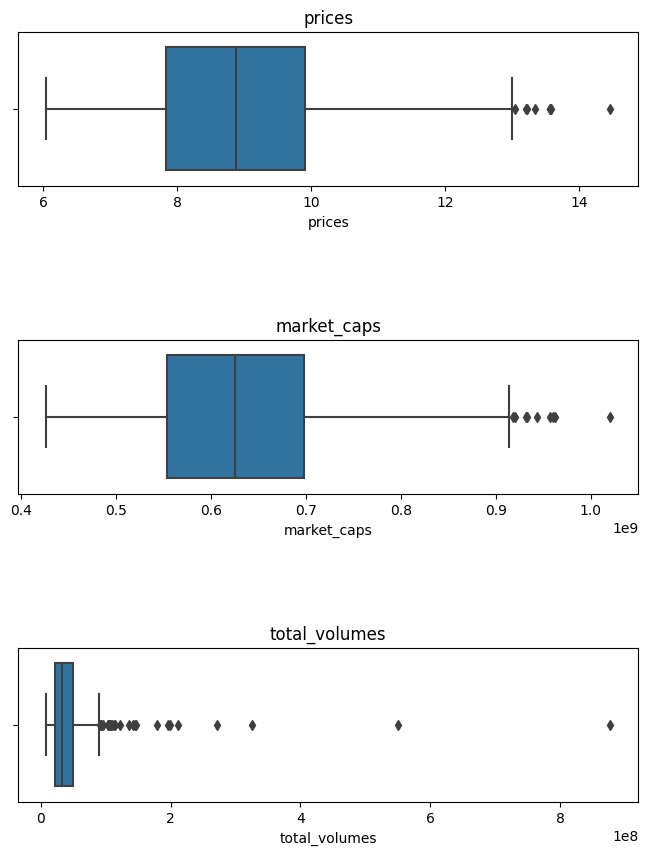

In [30]:
# Verificar si hay outlies o valores extremos

columnas_numericas = ['prices', 'market_caps', 'total_volumes']
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=df_neo_marker, ax=ax[i])
    ax[i].set_title(col)

Utilizando un dataframe de ohlc para la moneda neo

In [45]:
df_neo_ohlc = cargar_archivo("neo_ohlc.csv")
print(df_neo_ohlc.describe())

            Open       High        Low      Close
count  96.000000  96.000000  96.000000  96.000000
mean    9.091563   9.341667   8.756875   9.016875
std     1.777338   1.897772   1.675661   1.788277
min     6.130000   6.200000   6.050000   6.090000
25%     7.865000   8.045000   7.677500   7.727500
50%     8.940000   9.035000   8.595000   8.720000
75%     9.960000  10.132500   9.535000   9.775000
max    13.580000  14.460000  12.940000  13.560000


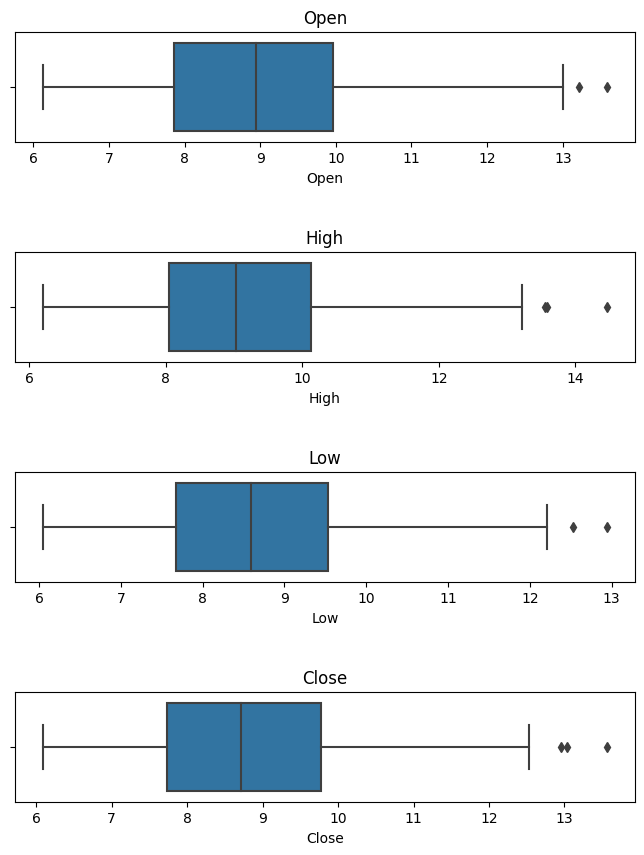

In [33]:
# Verificar si hay outlies o valores extremos
df_neo_ohlc = cargar_archivo("neo_ohlc.csv")

columnas_numericas = ['Open', 'High', 'Low','Close']
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=df_neo_ohlc, ax=ax[i])
    ax[i].set_title(col)

Utilizando el archivo con todo el contenido de market para todas las monedas para graficar los outlier

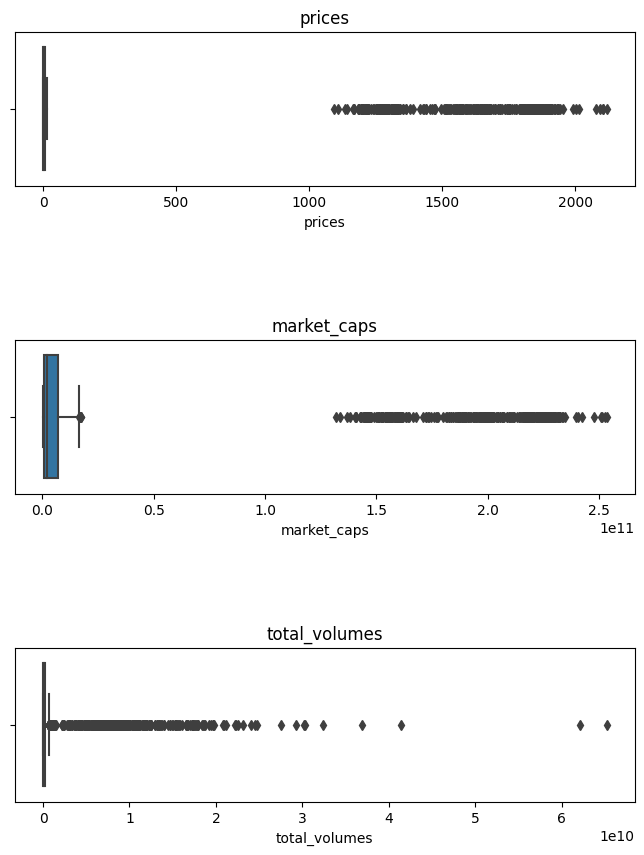

In [43]:
# Verificar si hay outlies o valores extremos
df_criptomonedas_market = cargar_archivo("criptomonedas_market.csv")

columnas_numericas = ['prices', 'market_caps','total_volumes']
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=df_criptomonedas_market, ax=ax[i])
    ax[i].set_title(col)

Utilizando el archivo con todo el contenido de ohlc para todas las monedas para graficar los outlier

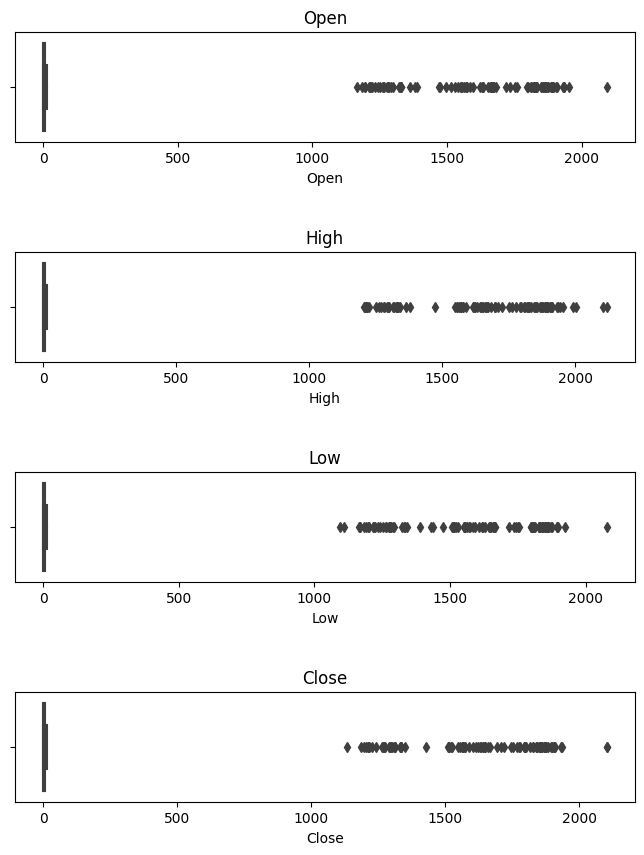

In [44]:
# Verificar si hay outlies o valores extremos
df_criptomonedas_ohlc = cargar_archivo("criptomonedas_ohlc.csv")

columnas_numericas = ['Open', 'High', 'Low','Close']
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=df_criptomonedas_ohlc, ax=ax[i])
    ax[i].set_title(col)

Se realizan algunos graficos diferentes para verificar los datos.

In [113]:
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
#import mplfinance as candlestickohlc

Datasets de ohlc

Se hace un grafico scatter plot y se grafica Time, Close, Low, High para la moneda neo

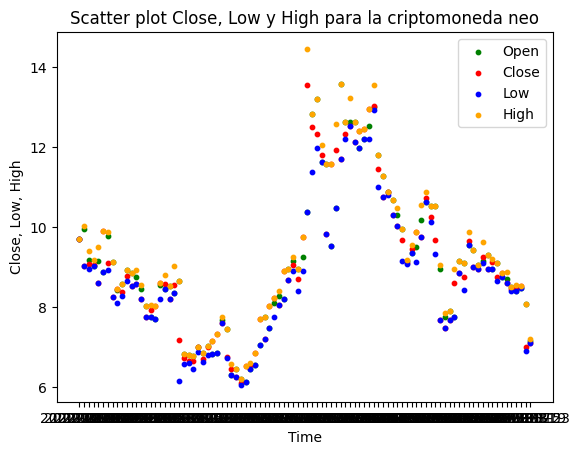

In [96]:
import matplotlib.pyplot as plt

df_neo_ohlc = cargar_archivo("neo_ohlc.csv")

# Crear el gráfico de dispersión
xTime = df_neo_ohlc['Time']
yLow = df_neo_ohlc['Low']
yClose = df_neo_ohlc['Close']
yOpen = df_neo_ohlc['Open']
yHigh = df_neo_ohlc['High']

plt.scatter(xTime, yOpen, c = "green", label = "Open", s=10)
plt.scatter(xTime, yClose, c = "red", label = "Close", s=10)
plt.scatter(xTime, yLow, c = "blue", label = "Low", s=10)
plt.scatter(xTime, yHigh, c = "orange", label = "High", s=10)
# Personalizar el gráfico
plt.title('Scatter Plot de Time vs Close')
plt.xlabel('Time')
plt.ylabel('Close, Low, High')
plt.legend()
plt.title('Scatter plot Close, Low y High para la criptomoneda neo')
# Mostrar el gráfico
plt.show()

Se realiza graficos de Histograma con el campo Open

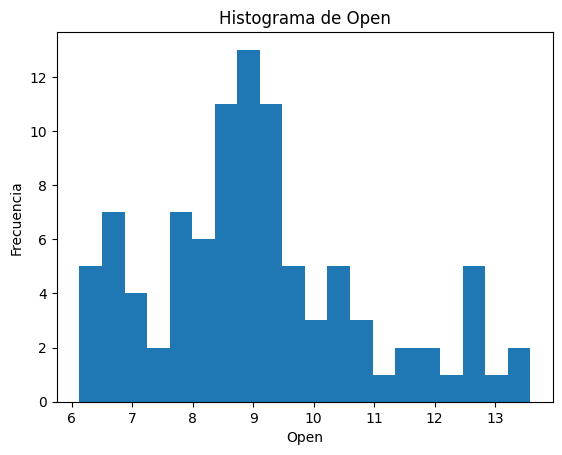

In [95]:
df_neo_ohlc = cargar_archivo("neo_ohlc.csv")

plt.hist(df_neo_ohlc['Open'], bins=20)  # Puedes ajustar el número de bins según tus datos
plt.title('Histograma de Open')
plt.xlabel('Open')
plt.ylabel('Frecuencia')
plt.show()

<BarContainer object of 96 artists>

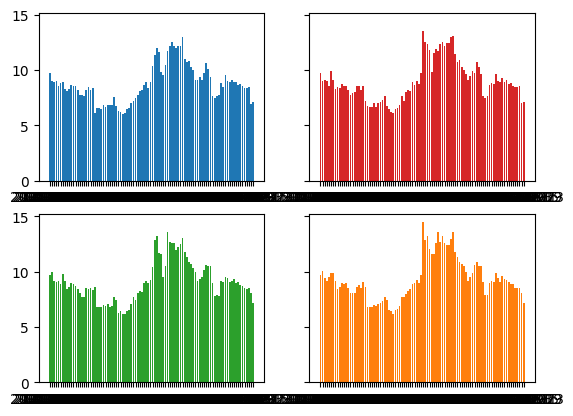

In [107]:
fig, ax = plt.subplots(2, 2, sharey = True)

ax[0, 0].bar(df_neo_ohlc['Time'], df_neo_ohlc['Low'], color = 'tab:blue')
ax[0, 1].bar(df_neo_ohlc['Time'], df_neo_ohlc['Close'], color = 'tab:red')
ax[1, 0].bar(df_neo_ohlc['Time'], df_neo_ohlc['Open'], color = 'tab:green')
ax[1, 1].bar(df_neo_ohlc['Time'], df_neo_ohlc['High'], color = 'tab:orange')

Se realiza graficos de velas

- Opcion 1

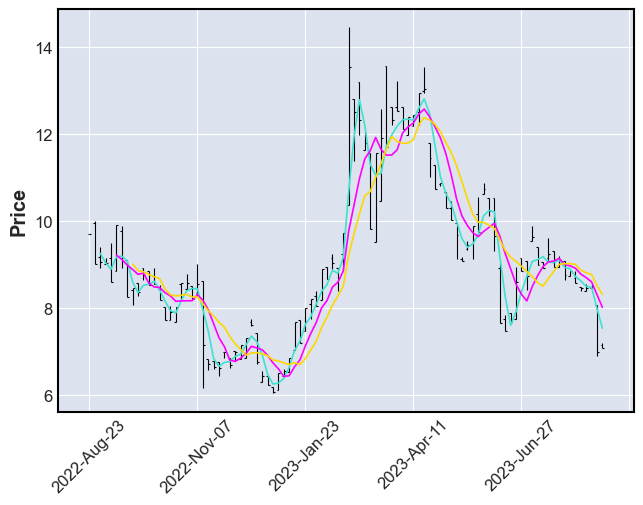

In [167]:
import mplfinance as mpf
df_neo_ohlc = pd.read_csv('./Datasets/neo_ohlc.csv',index_col=0,parse_dates=True,sep=';')

df_neo_ohlc.index.name = 'Time'
mpf.plot(df_neo_ohlc, type='ohlc', mav=(3,6,9))
#mpf.plot(data,type='candle',mav=(3,6,9),show_nontrading=True)
#mpf.plot(data, type='ohlc', mav=4)

- Opcion 2

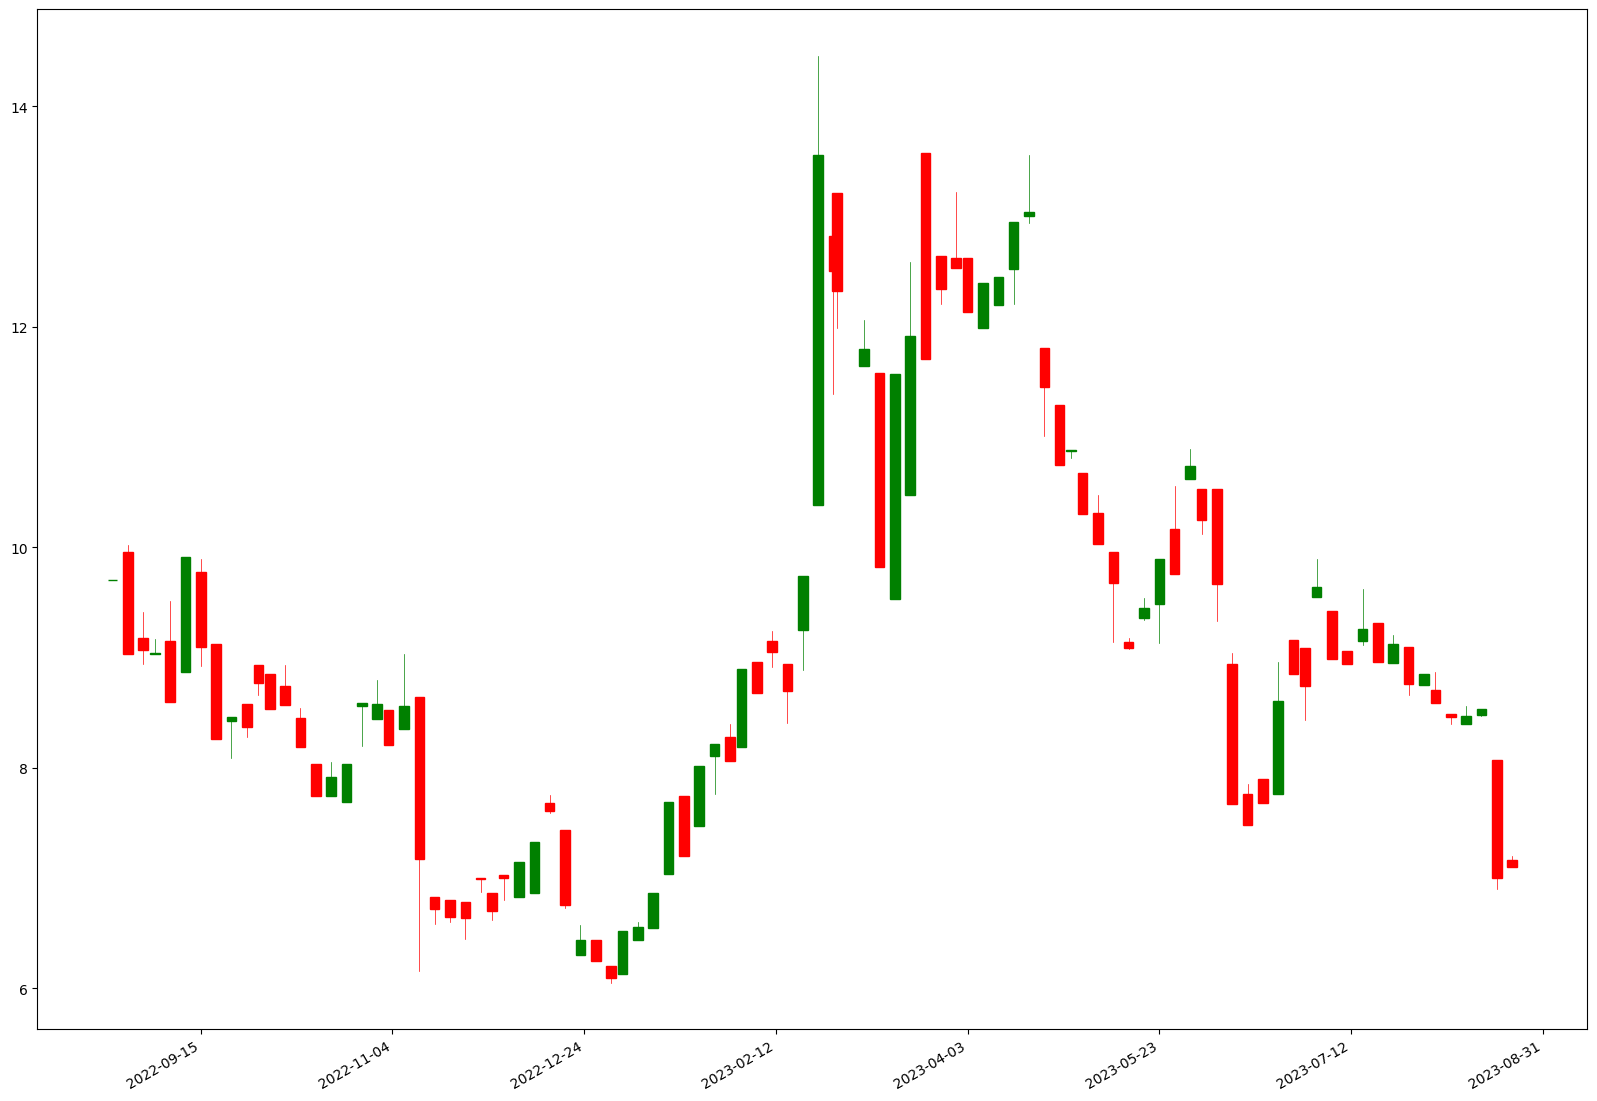

In [114]:
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

df_neo_ohlc = cargar_archivo("neo_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_neo_ohlc['Time'] = pd.to_datetime(df_neo_ohlc['Time'])
df_neo_ohlc['Time'] = df_neo_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_neo_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()

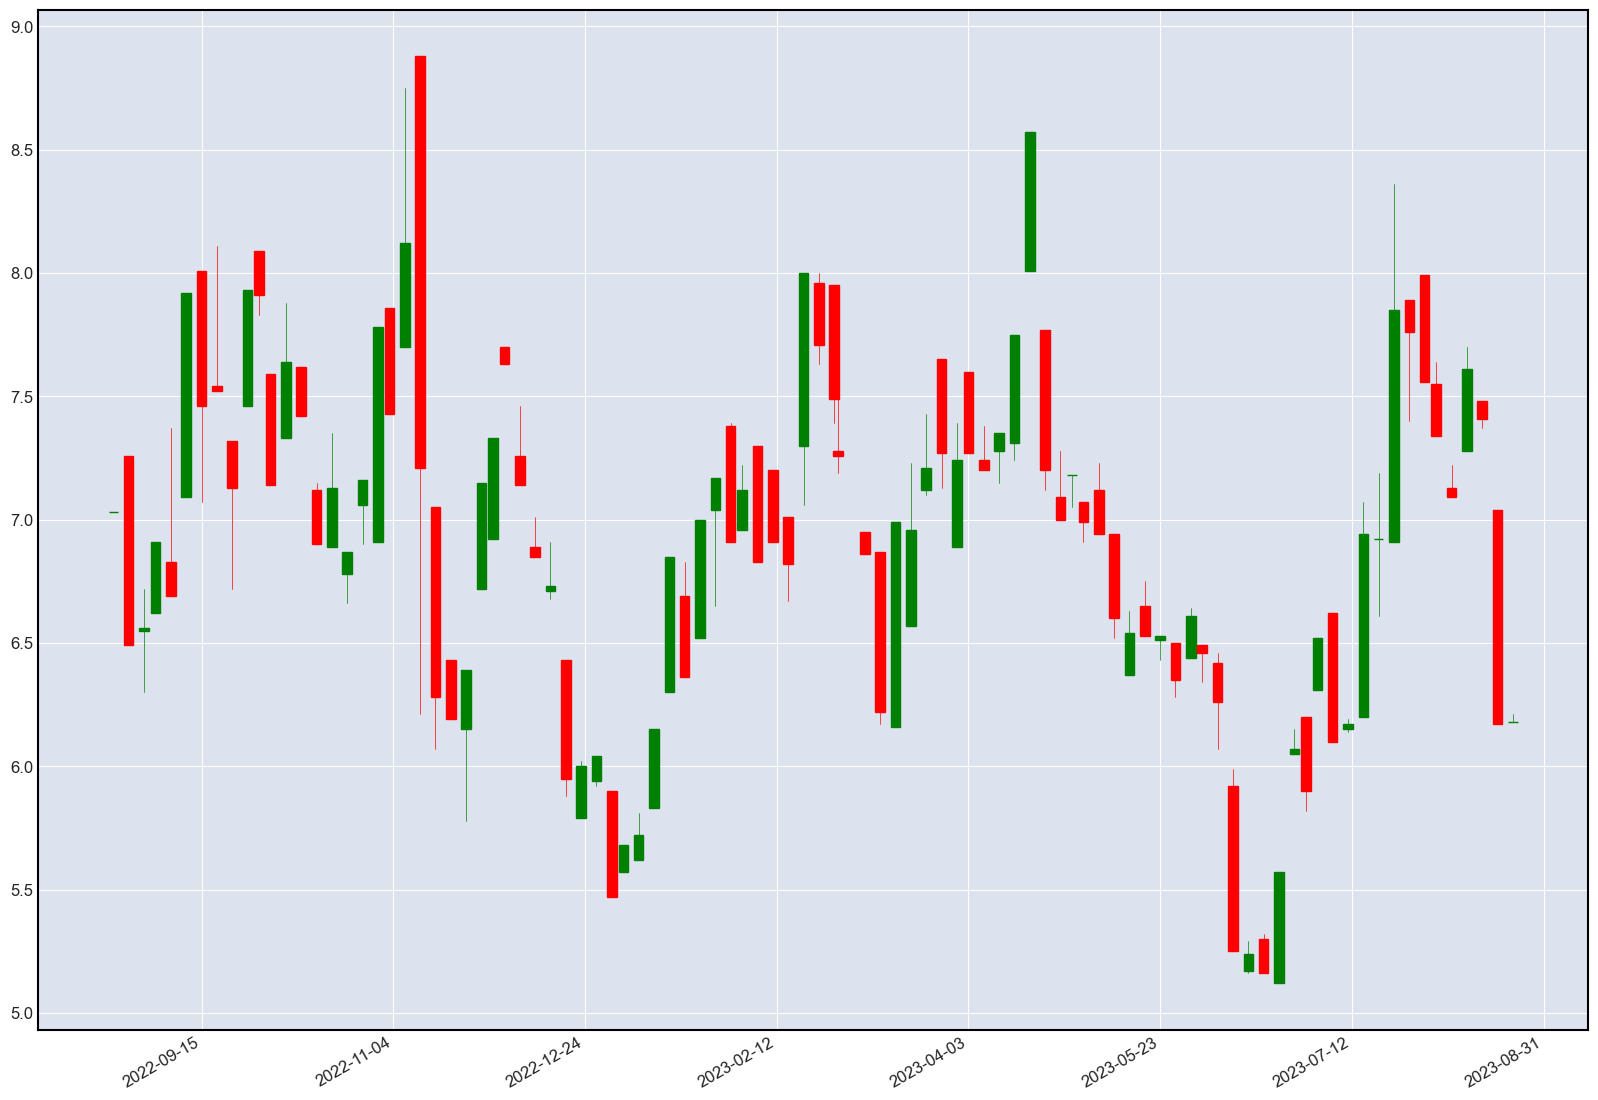

In [168]:
df_chainlink_ohlc = cargar_archivo("chainlink_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_chainlink_ohlc['Time'] = pd.to_datetime(df_chainlink_ohlc['Time'])
df_chainlink_ohlc['Time'] = df_chainlink_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_chainlink_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()

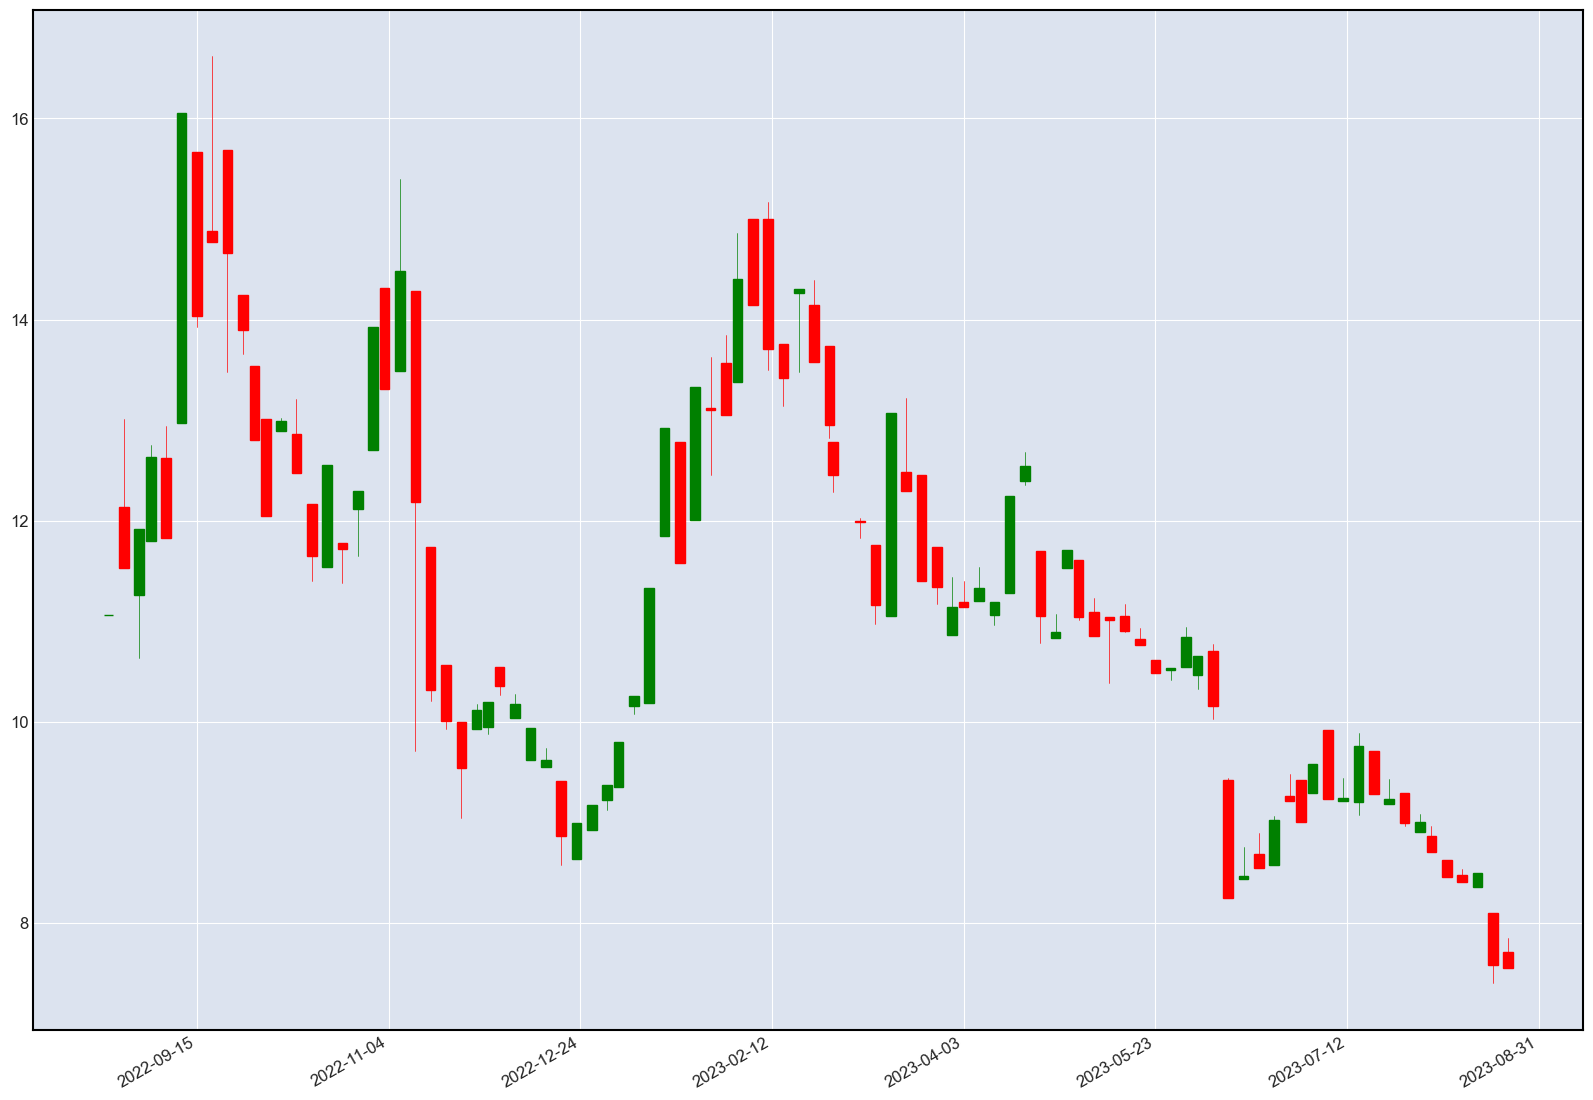

In [169]:
df_cosmos_ohlc = cargar_archivo("cosmos_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_cosmos_ohlc['Time'] = pd.to_datetime(df_cosmos_ohlc['Time'])
df_cosmos_ohlc['Time'] = df_cosmos_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_cosmos_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()

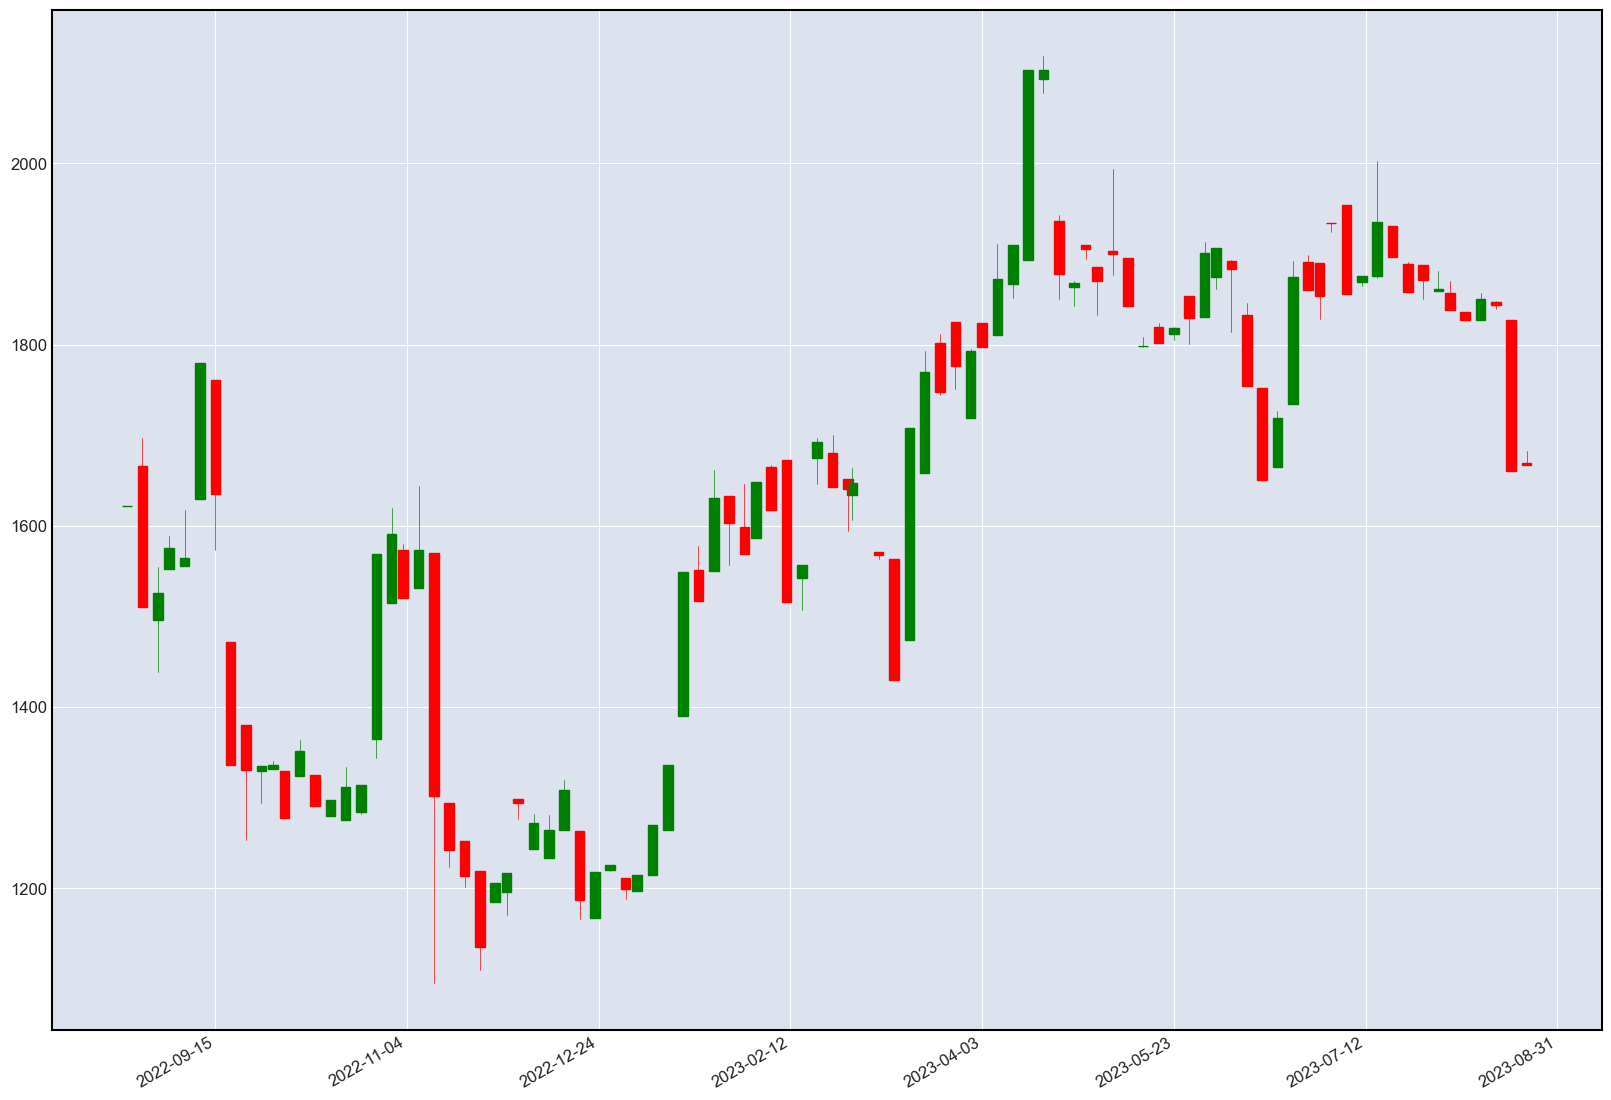

In [170]:
df_ethereum_ohlc = cargar_archivo("ethereum_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_ethereum_ohlc['Time'] = pd.to_datetime(df_ethereum_ohlc['Time'])
df_ethereum_ohlc['Time'] = df_ethereum_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_ethereum_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()

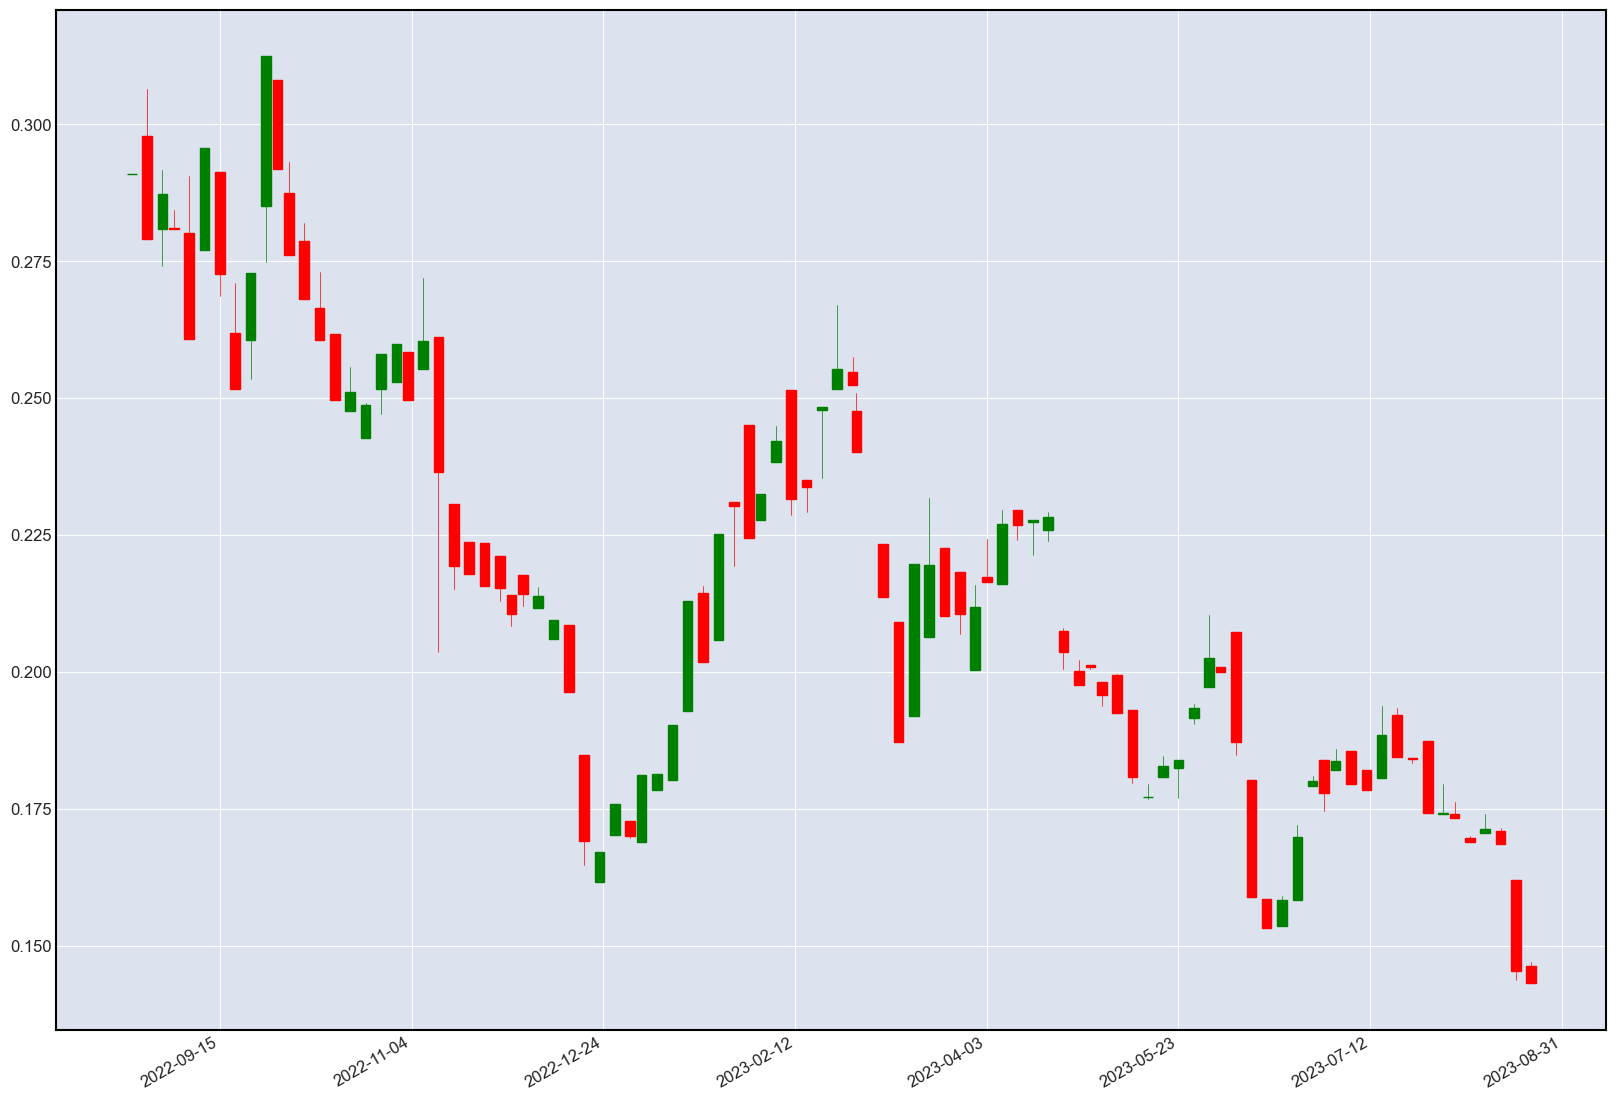

In [171]:
df_iota_ohlc = cargar_archivo("iota_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_iota_ohlc['Time'] = pd.to_datetime(df_iota_ohlc['Time'])
df_iota_ohlc['Time'] = df_iota_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_iota_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()

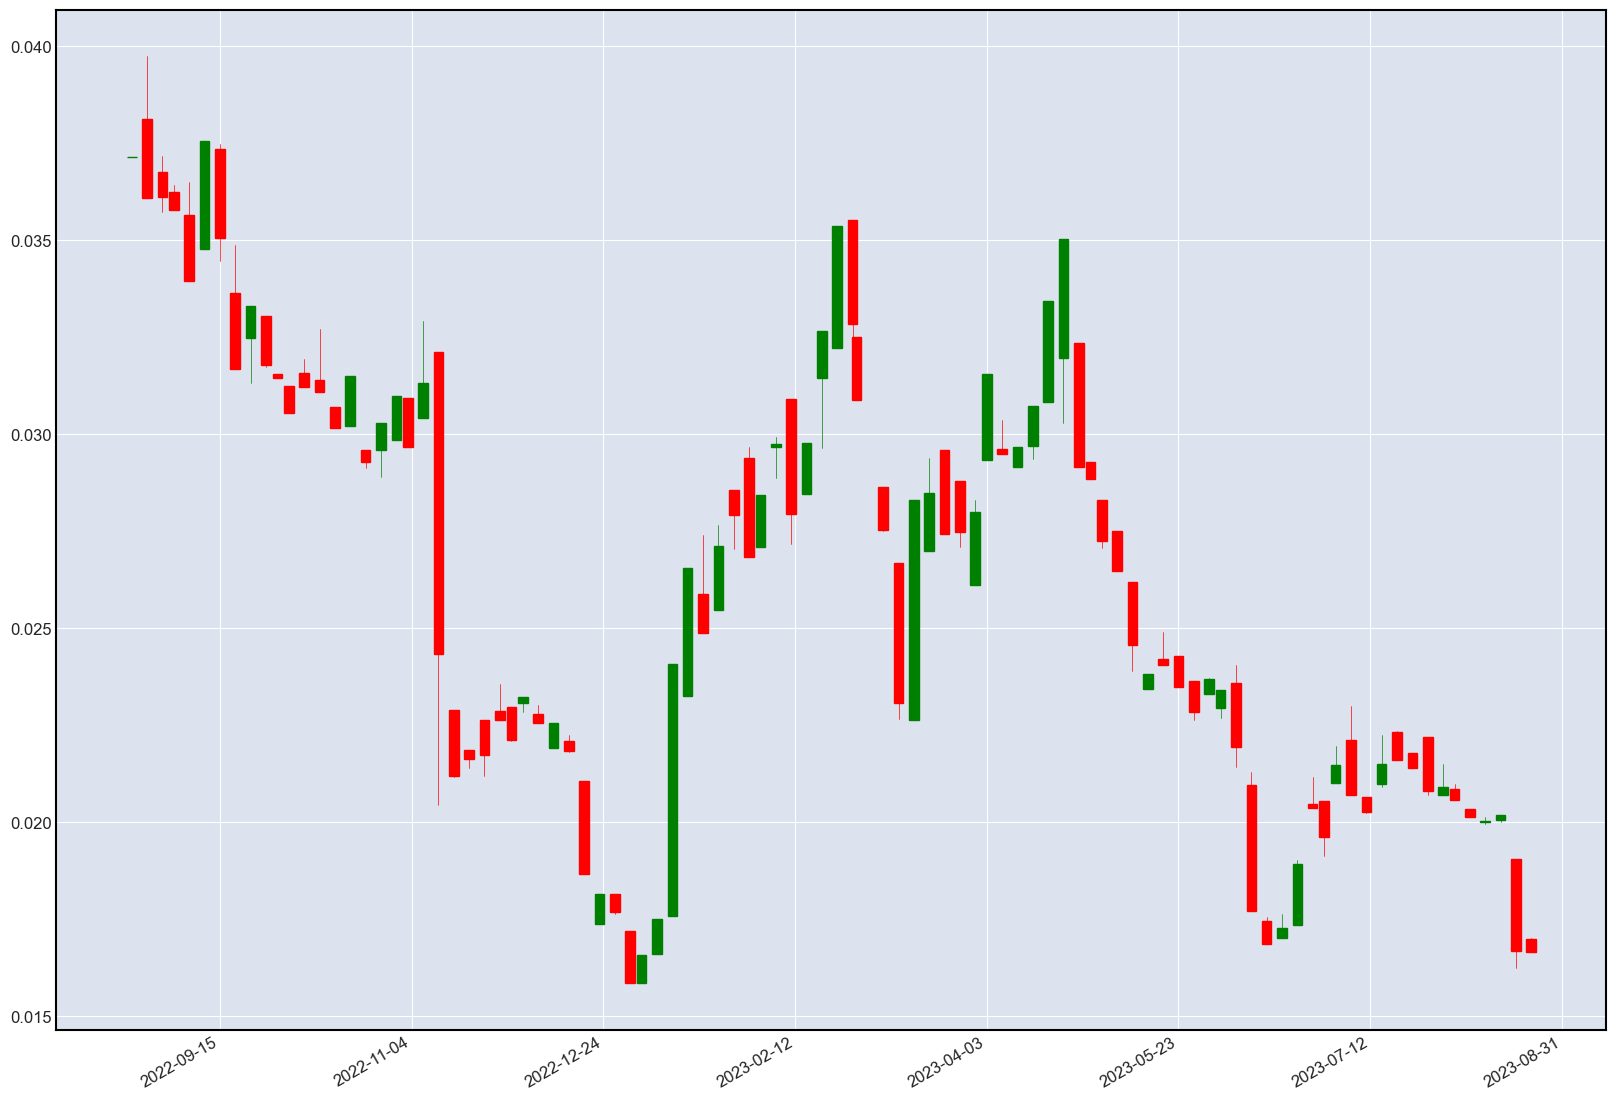

In [172]:
df_zilliqa_ohlc = cargar_archivo("zilliqa_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_zilliqa_ohlc['Time'] = pd.to_datetime(df_zilliqa_ohlc['Time'])
df_zilliqa_ohlc['Time'] = df_zilliqa_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_zilliqa_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()

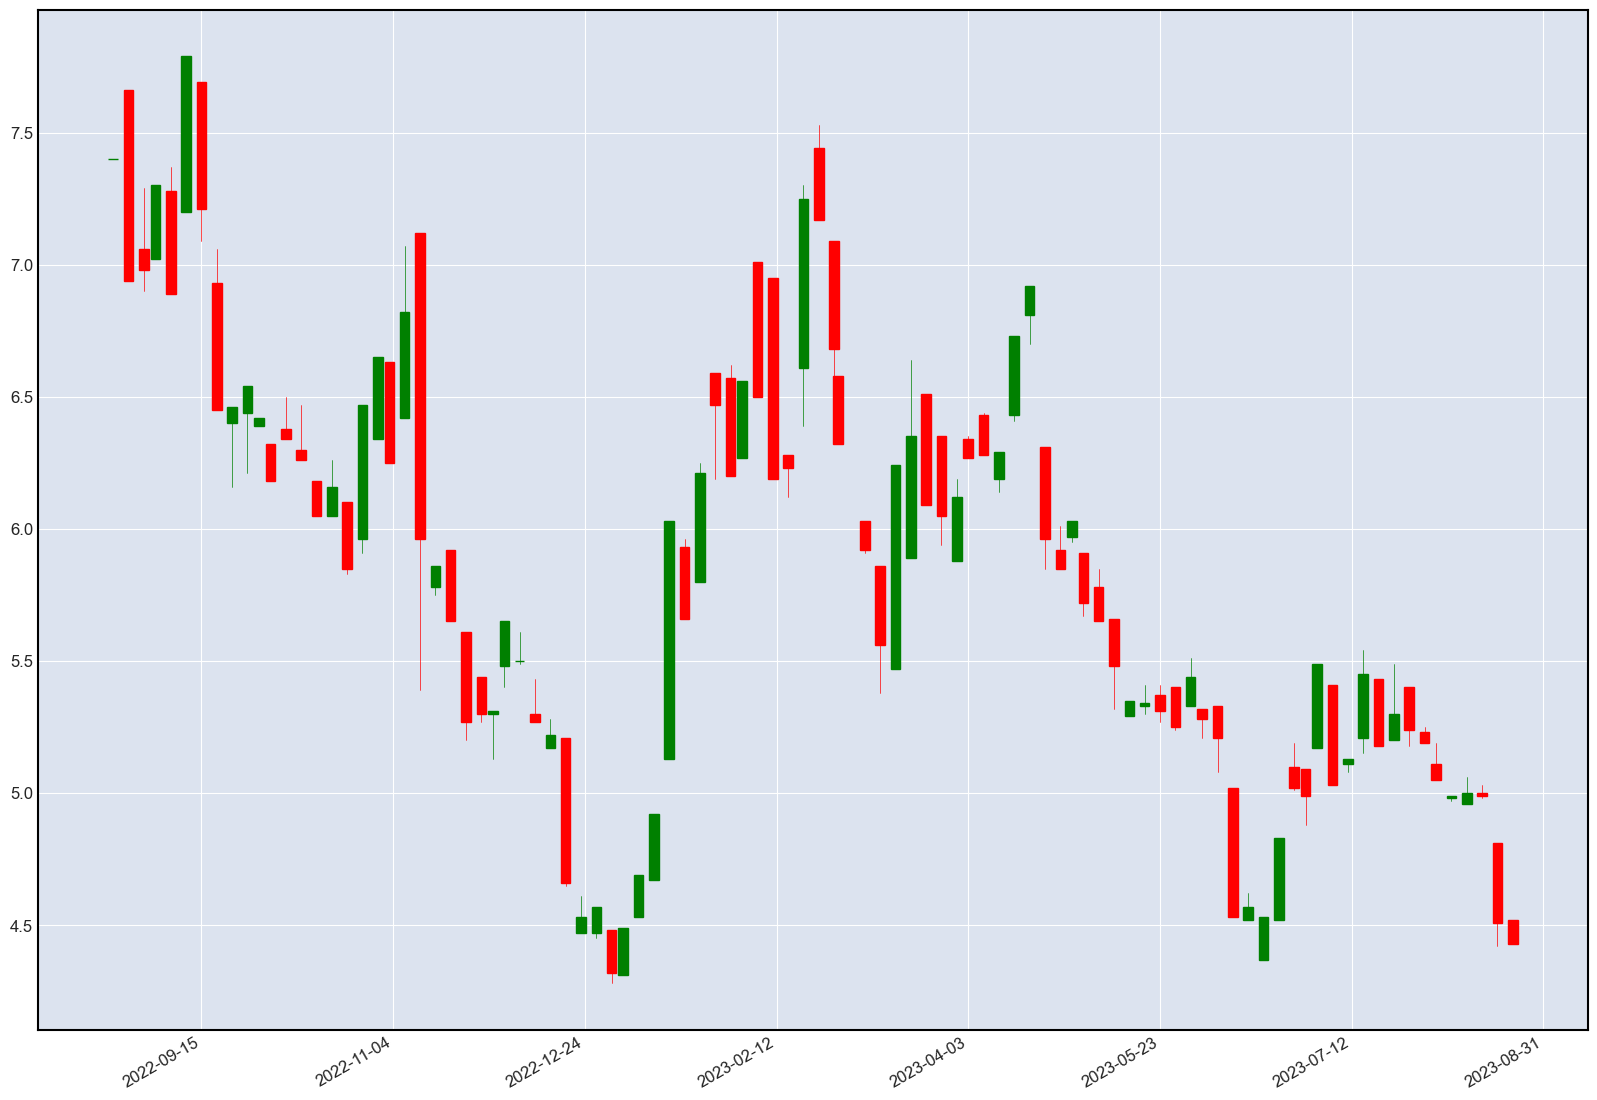

In [173]:
df_polkadot_ohlc = cargar_archivo("polkadot_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_polkadot_ohlc['Time'] = pd.to_datetime(df_polkadot_ohlc['Time'])
df_polkadot_ohlc['Time'] = df_polkadot_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_polkadot_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()

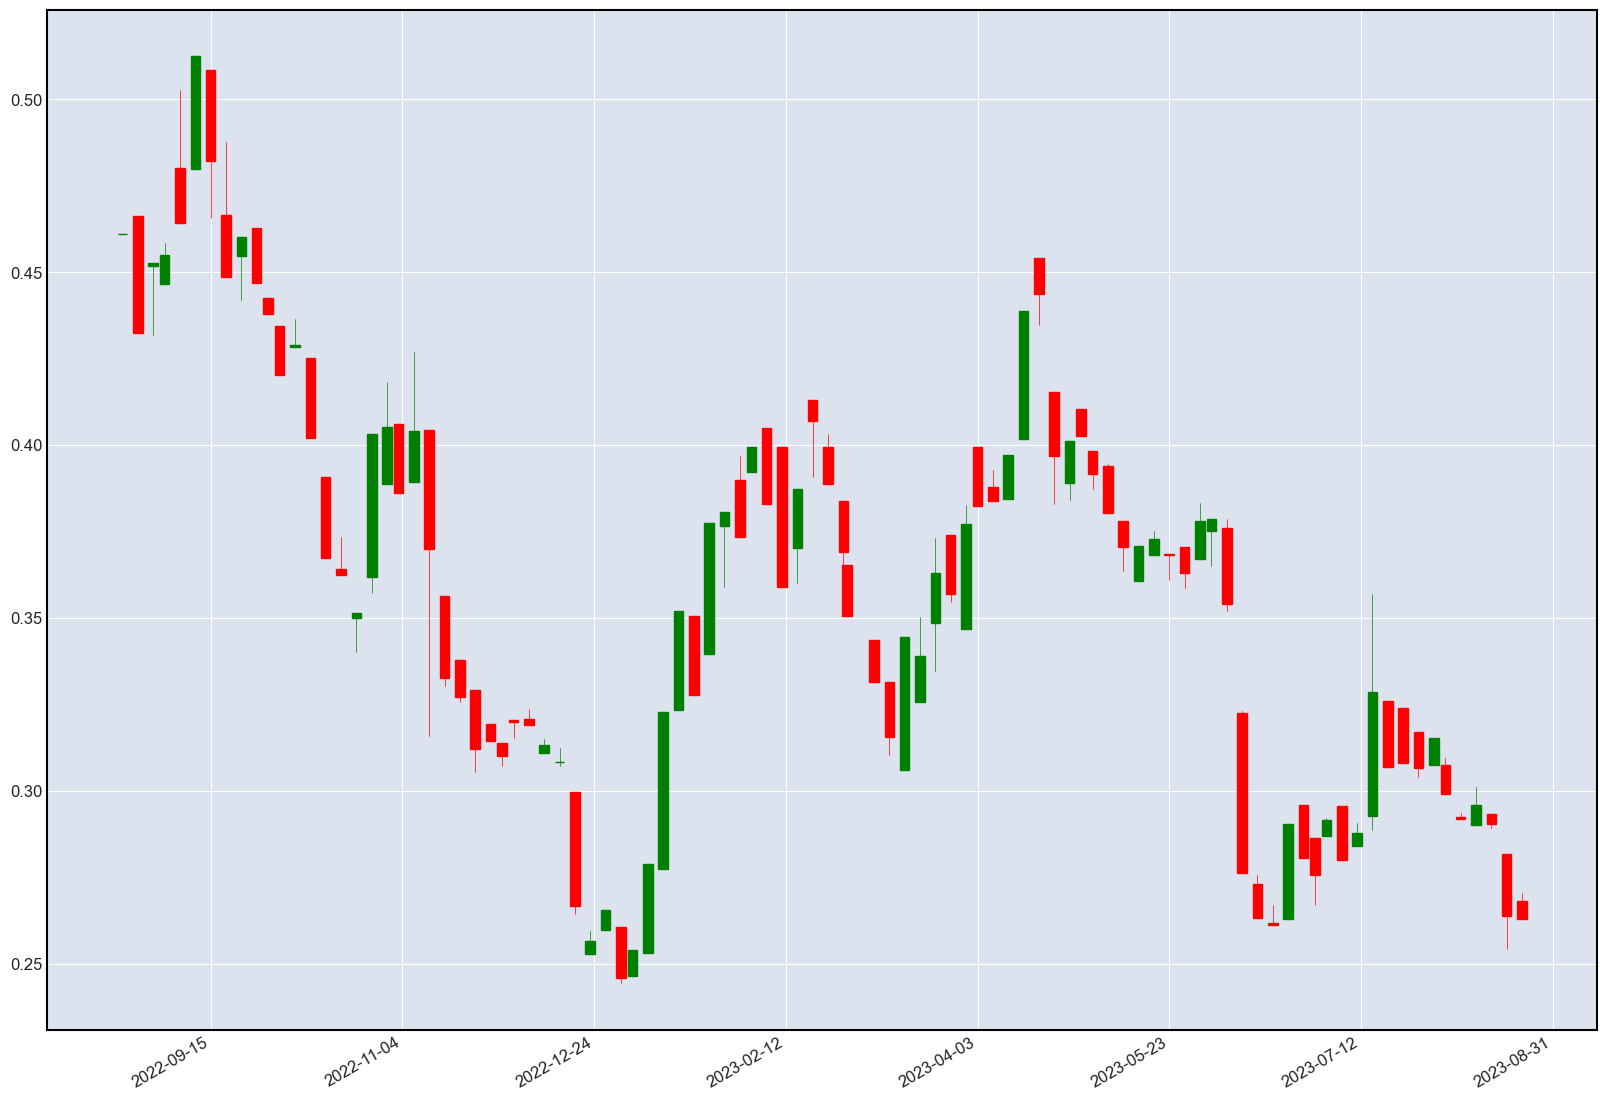

In [174]:
df_cardano_ohlc = cargar_archivo("cardano_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_cardano_ohlc['Time'] = pd.to_datetime(df_cardano_ohlc['Time'])
df_cardano_ohlc['Time'] = df_cardano_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_cardano_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()

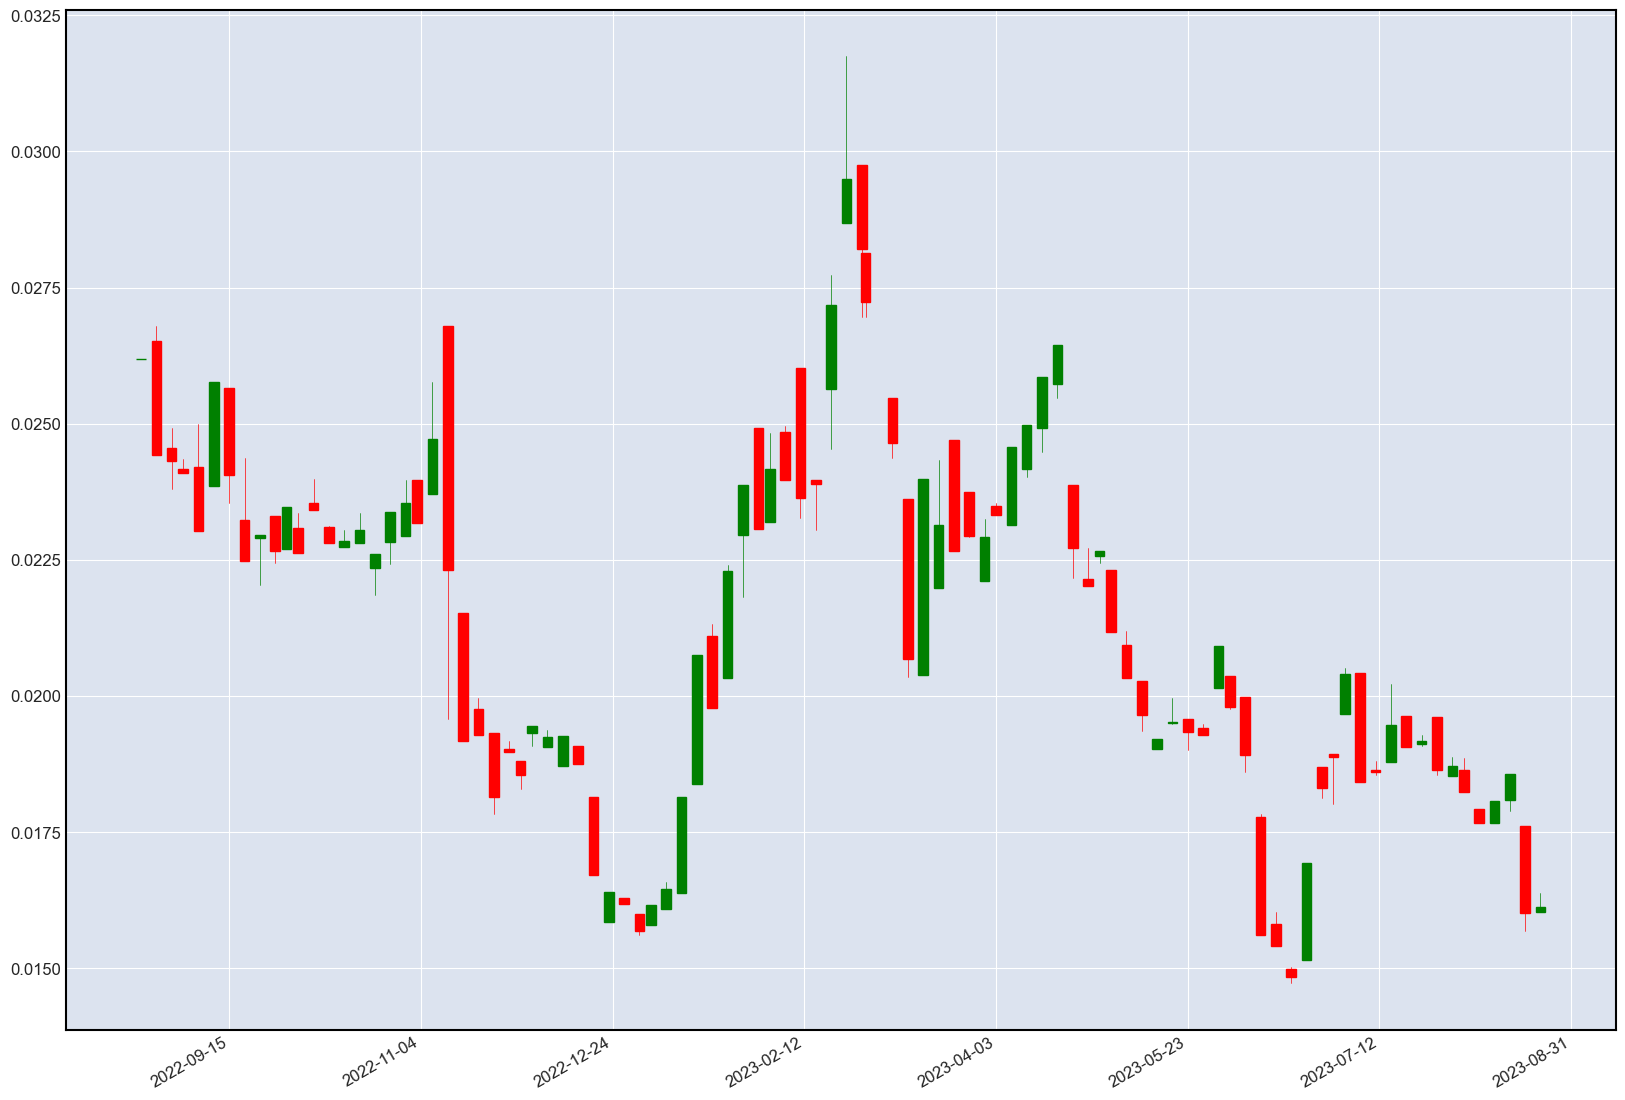

In [175]:
df_vechain_ohlc = cargar_archivo("vechain_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_vechain_ohlc['Time'] = pd.to_datetime(df_vechain_ohlc['Time'])
df_vechain_ohlc['Time'] = df_vechain_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_vechain_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()

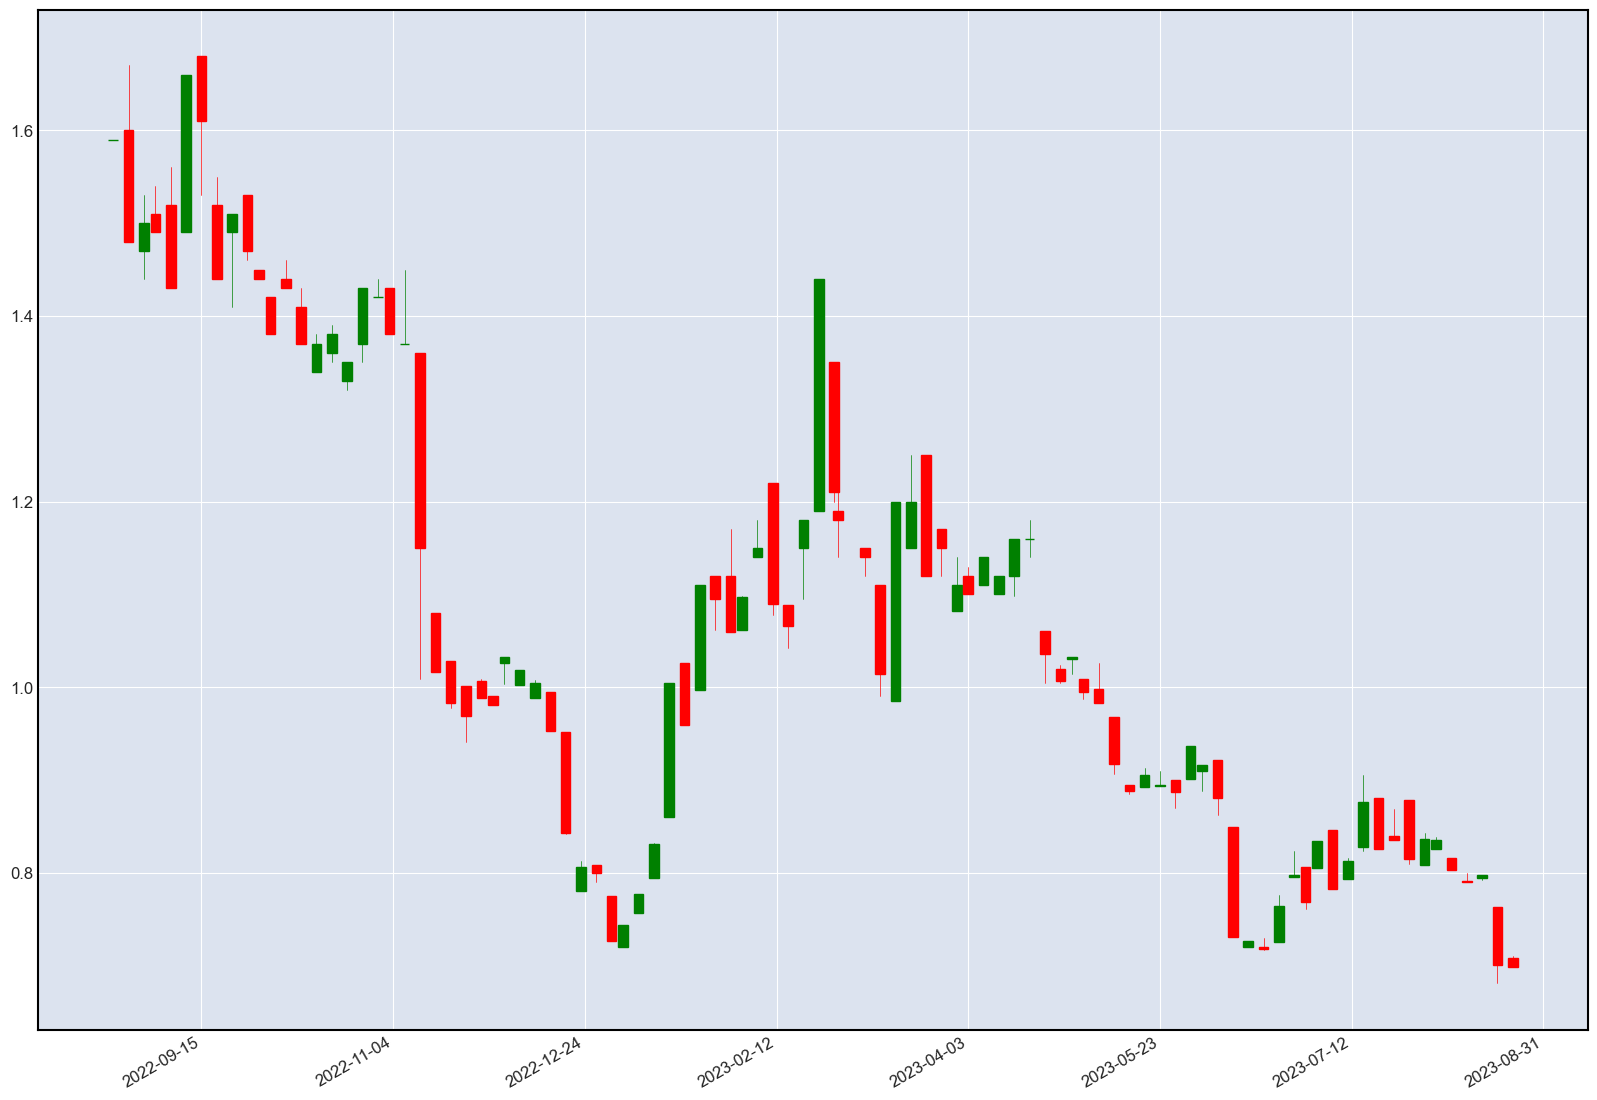

In [176]:
df_tezos_ohlc = cargar_archivo("tezos_ohlc.csv")

# Convertir la columna de fechas a un formato de fecha reconocido por matplotlib
df_tezos_ohlc['Time'] = pd.to_datetime(df_tezos_ohlc['Time'])
df_tezos_ohlc['Time'] = df_tezos_ohlc['Time'].apply(mdates.date2num)

# Crear una figura y un subplot
fig, ax = plt.subplots(figsize=(20,15))

# Configurar el formato de las fechas en el eje x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Plot de las velas
candlestick_ohlc(ax, 
                df_tezos_ohlc[['Time', 'Open', 'High', 'Low', 'Close']].values, 
                width = 2.5, 
                colorup = 'green', 
                colordown = 'red')

# Configurar las etiquetas del eje x para que se muestren correctamente
fig.autofmt_xdate()

# Mostrar el gráfico
plt.show()